# 🧮 Subespacios en $\mathbb{R}^3$

En esta lección extendemos las ideas de subespacios desde $\mathbb{R}^2$ al espacio tridimensional $\mathbb{R}^3$.  
Veremos cómo identificar **rectas** y **planos** que pasan por el origen, cómo **clasificar** el subespacio generado por un conjunto de vectores (dimensión 0, 1, 2 o 3), y cómo **proyectar** vectores sobre subespacios.

---

## 🔹 1. ¿Qué es un subespacio en $\mathbb{R}^3$?

Un conjunto $S \subseteq \mathbb{R}^3$ es un **subespacio vectorial** si cumple:

1. **Cero en el conjunto:** $\mathbf{0} \in S$  
2. **Cerrado bajo la suma:** si $\mathbf{u},\mathbf{v} \in S \Rightarrow \mathbf{u}+\mathbf{v} \in S$  
3. **Cerrado bajo escalares:** si $\mathbf{v} \in S$ y $\alpha \in \mathbb{R} \Rightarrow \alpha \mathbf{v} \in S$

> 🔎 En $\mathbb{R}^3$, los subespacios posibles (por dimensión) son:
> - **dim 0:** $\{\mathbf{0}\}$  
> - **dim 1:** **recta** que pasa por el origen  
> - **dim 2:** **plano** que pasa por el origen  
> - **dim 3:** todo $\mathbb{R}^3$

---

## 🔹 2. Formas típicas de subespacios

### 2.1 Subespacios definidos por **generadores** (span)

Dados vectores $\{v_1,\dots,v_k\}$, su **subespacio generado** es:
$$
\mathrm{span}\{v_1,\dots,v_k\} = \left\{ \sum_{i=1}^k \alpha_i v_i \;:\; \alpha_i \in \mathbb{R} \right\}
$$

- Si $k=1$ y $v_1 \neq \mathbf{0}$ → **recta** por el origen.  
- Si $k=2$ y son **independientes** → **plano** por el origen.  
- Si $k\ge 3$ e **independientes** → **$\mathbb{R}^3$**.

### 2.2 Subespacios definidos como **conjunto solución** de ecuaciones homogéneas

Dado $A \in \mathbb{R}^{m \times 3}$, el conjunto
$$
S = \{\, x \in \mathbb{R}^3 \mid A x = 0 \,\} = \ker(A)
$$
es un subespacio (el **núcleo** de $A$).  
- Si $\mathrm{rango}(A)=0$ → $S = \mathbb{R}^3$  
- Si $\mathrm{rango}(A)=1$ → $\dim S = 2$ (plano por el origen)  
- Si $\mathrm{rango}(A)=2$ → $\dim S = 1$ (recta por el origen)  
- Si $\mathrm{rango}(A)=3$ → $S = \{\mathbf{0}\}$

---

## 🔹 3. Herramientas computacionales (NumPy)

A continuación, funciones prácticas para **clasificar** y **trabajar** con subespacios.


In [1]:
import numpy as np

def basis_from_vectors(*vectors, tol=1e-10):
    """
    Devuelve una base (lista de columnas) del subespacio generado por 'vectors'
    usando un esquema codicioso: agrega columnas que incrementen el rango.
    """
    if len(vectors) == 0:
        return []
    M = np.column_stack(vectors)  # 3 x k
    basis_cols = []
    current = np.zeros((3,0))
    for j in range(M.shape[1]):
        candidate = M[:, [j]]
        new = np.hstack([current, candidate])
        if np.linalg.matrix_rank(new, tol=tol) > np.linalg.matrix_rank(current, tol=tol):
            basis_cols.append(M[:, j])
            current = new
    return basis_cols

def classify_span(*vectors, tol=1e-10):
    """
    Clasifica el span de los vectores en R3: dim=0,1,2,3.
    Retorna (dim, descripcion)
    """
    if len(vectors) == 0:
        return 0, "Sólo el vector nulo {0}"
    M = np.column_stack(vectors)
    dim = np.linalg.matrix_rank(M, tol=tol)
    if dim == 0:
        desc = "dim 0 → {0}"
    elif dim == 1:
        desc = "dim 1 → recta por el origen"
    elif dim == 2:
        desc = "dim 2 → plano por el origen"
    else:
        desc = "dim 3 → todo R^3"
    return dim, desc

def nullspace_basis(A, tol=1e-12):
    """
    Base del núcleo de A (Ax=0) usando SVD.
    Devuelve columnas que forman una base de la nullspace.
    """
    U, S, Vt = np.linalg.svd(A)
    # valores singulares ~0 → direcciones en la nullspace
    null_mask = (S <= tol)
    if A.shape[0] < A.shape[1]:
        # completar con columnas sobrantes en Vt si hay
        # pero en R3, A es m x 3, Vt es 3 x 3
        pass
    # Cuando S tiene longitud = min(m,n). En R3, n=3:
    # nullspace son columnas de V asociadas a singular values ~0.
    # Reconstruimos índice a partir de S y Vt.
    # Para estabilidad, usamos un umbral relativo también:
    tol_rel = tol * max(A.shape)
    null_indices = [i for i, s in enumerate(S) if s <= tol or s <= tol_rel]
    # Si no detecta por S, también podemos usar rango para decidir:
    rank = np.sum(S > tol)
    if rank < A.shape[1]:
        null_indices = list(range(rank, A.shape[1]))
    V = Vt.T
    return [V[:, i] for i in null_indices]

def projection_onto_span(vectors, x):
    """
    Proyección ortogonal de x sobre el span de 'vectors' en R3.
    Usa pseudoinversa: P = V (V^+) con V = [v1 v2 ...]
    """
    if len(vectors) == 0:
        return np.zeros_like(x)
    V = np.column_stack(vectors)  # 3 x k
    P = V @ np.linalg.pinv(V)
    return P @ x

---

## 🔹 4. Visualización 3D de rectas y planos (que pasan por el origen)

### 4.1 Recta generada por un vector no nulo

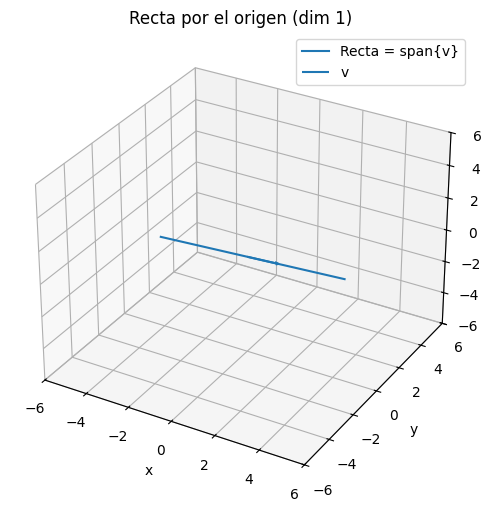

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v = np.array([2, -1, 1])
t = np.linspace(-3, 3, 50)
linea = np.vstack([t*v[0], t*v[1], t*v[2]])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(linea[0], linea[1], linea[2], label='Recta = span{v}')
ax.quiver(0,0,0,*v, label='v', arrow_length_ratio=0.1)

ax.set_xlim(-6,6); ax.set_ylim(-6,6); ax.set_zlim(-6,6)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.legend(); ax.set_title('Recta por el origen (dim 1)')
plt.show()

### 4.2 Plano generado por dos vectores independientes

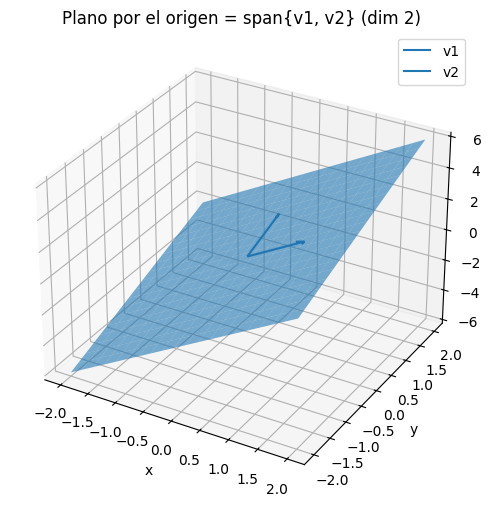

In [3]:
v1 = np.array([1, 0, 2])
v2 = np.array([0, 1, 1])

a = np.linspace(-2, 2, 20)
b = np.linspace(-2, 2, 20)
A, B = np.meshgrid(a, b)
X = A*v1[0] + B*v2[0]
Y = A*v1[1] + B*v2[1]
Z = A*v1[2] + B*v2[2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.6)
ax.quiver(0,0,0,*v1, arrow_length_ratio=0.1, label='v1')
ax.quiver(0,0,0,*v2, arrow_length_ratio=0.1, label='v2')

ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_title('Plano por el origen = span{v1, v2} (dim 2)')
ax.legend(); plt.show()

---

## 🔹 5. Clasificar y construir subespacios (casos prácticos)

### 5.1 Dado un conjunto de generadores

In [4]:
v1 = np.array([1, 2, 3])
v2 = np.array([2, 4, 6])   # dependiente de v1
v3 = np.array([0, 1, 0])

dim, desc = classify_span(v1, v2, v3)
base = basis_from_vectors(v1, v2, v3)

print("Dimensión del span:", dim, "→", desc)
print("Base propuesta:")
for b in base:
    print(b)

Dimensión del span: 2 → dim 2 → plano por el origen
Base propuesta:
[1 2 3]
[0 1 0]


### 5.2 Dado un sistema homogéneo Ax=0

* Si $A$ tiene **rango 1**, el **kernel** es un **plano** (dim 2).
* Si $A$ tiene **rango 2**, el kernel es una **recta** (dim 1).

In [5]:
# Ejemplo: plano ax + by + cz = 0 → A es 1x3 y el plano es ker(A)
A = np.array([[1, -1, 2]])  # x - y + 2z = 0
B = nullspace_basis(A)
print("Base del plano (ker A):")
for b in B:
    print(b)

# Ejemplo: dos ecuaciones → intersección de dos planos (recta)
A2 = np.array([[1, -1, 2],
               [0,  1, 1]])
B2 = nullspace_basis(A2)
print("\nBase de la recta (ker A2):")
for b in B2:
    print(b)

Base del plano (ker A):
[0.40824829 0.88164966 0.23670068]
[-0.81649658  0.23670068  0.52659863]

Base de la recta (ker A2):
[-0.90453403 -0.30151134  0.30151134]


---

## 🔹 6. Proyección ortogonal sobre una recta o plano por el origen

La proyección permite “caer” ortogonalmente desde un vector $x$ hasta el subespacio $S$.

In [6]:
# Proyección de x sobre span{v1, v2}
x  = np.array([2, 2, 3])
v1 = np.array([1, 0, 2])
v2 = np.array([0, 1, 1])

x_proj = projection_onto_span([v1, v2], x)
print("x:", x)
print("Proyección de x sobre span{v1, v2}:", x_proj)
print("Vector error (x - proy):", x - x_proj)


x: [2 2 3]
Proyección de x sobre span{v1, v2}: [1.  1.5 3.5]
Vector error (x - proy): [ 1.   0.5 -0.5]


### Visualización: punto y su proyección sobre un plano por el origen


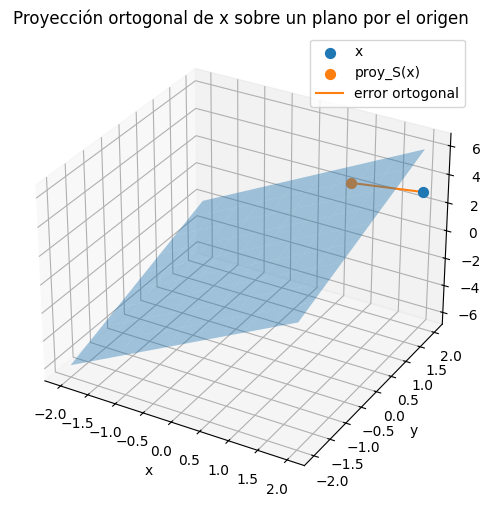

In [7]:
# Reusar v1, v2 y x del bloque anterior
a = np.linspace(-2, 2, 10)
b = np.linspace(-2, 2, 10)
A, B = np.meshgrid(a, b)
X = A*v1[0] + B*v2[0]
Y = A*v1[1] + B*v2[1]
Z = A*v1[2] + B*v2[2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plano
ax.plot_surface(X, Y, Z, alpha=0.4)

# Punto x y su proyección
ax.scatter([x[0]], [x[1]], [x[2]], s=50, label='x')
ax.scatter([x_proj[0]], [x_proj[1]], [x_proj[2]], s=50, label='proy_S(x)')
# Segmento ortogonal entre x y su proyección
ax.plot([x[0], x_proj[0]], [x[1], x_proj[1]], [x[2], x_proj[2]], label='error ortogonal')

ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_title('Proyección ortogonal de x sobre un plano por el origen')
ax.legend(); plt.show()


---

## 🔹 7. Resumen conceptual

* Un **subespacio** de $\mathbb{R}^3$ es estable por suma y escalares, e incluye al vector nulo.
* Por **generadores** (span), su dimensión es el **rango** de la matriz de columnas.
* Por **ecuaciones homogéneas** $Ax=0$, su dimensión es $3 - \mathrm{rango}(A)$.
* **dim 1:** recta por el origen. **dim 2:** plano por el origen. **dim 3:** todo $\mathbb{R}^3$.
* La **proyección** ortogonal sobre un subespacio $S=\mathrm{span}(V)$ se computa con $P=V(V^+)$.

---

## 🧩 8. Ejercicios sugeridos de programación

1. **Clasificador general de subespacios**
   Escribe una función `clasificar_subespacio_desde_generadores(*vectores)` que:

   * Devuelva `(dimensión, base, descripción)`
   * Grafique la recta/plano si `dim ∈ {1,2}` y, si `dim=3`, muestre los ejes base.

2. **Kernel y rango**
   Implementa `subespacio_kernel(A)` que:

   * Devuelva una base del kernel de `A` (usando SVD), su dimensión y una frase interpretativa (recta/plano).
   * Verifique con ejemplos donde `rank(A) = 0, 1, 2`.

3. **Proyección y distancia**
   Crea `distancia_a_subespacio(x, *vectores)` que:

   * Calcule $|x - \mathrm{proj}_S(x)|$ y grafique el punto, la proyección y el segmento ortogonal.

4. **Intersección de subespacios**
   Dadas dos matrices $A$ y $B$, programa una rutina que compute una base del subespacio
   $$
   {,x \in \mathbb{R}^3 \mid Ax=0 ,} \cap {,x \in \mathbb{R}^3 \mid Bx=0 ,}
   $$
   (Sugerencia: apila las ecuaciones y calcula el kernel combinado).

5. **Explorador aleatorio**
   Genera de forma aleatoria conjuntos de 1–3 vectores en $\mathbb{R}^3$,
   clasifícalos (línea/plano/espacio), y grafícalos automáticamente con una interfaz mínima (sliders o inputs simples).

---

## ✅ Cierre

Dominar los **subespacios en $\mathbb{R}^3$** te permite reconocer estructuras:
ver cuándo un conjunto de vectores solo define una **dirección**, un **plano** o el **espacio completo**;
y calcular **proyecciones** y **distancias** que son esenciales en optimización, gráficos 3D y aprendizaje automático.

> “Los subespacios son los escenarios donde viven nuestras soluciones: reconocerlos y operar en ellos es aprender a ver la geometría del álgebra.”
